In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

    # Load the anime dataset
df = pd.read_csv("anime-filtered.csv")

  

In [13]:
  # Limit the dataframe to 500 rows
df = df.head(500)

print(df.head())


   anime_id                             Name  Score  \
0         1                     Cowboy Bebop   8.78   
1         5  Cowboy Bebop: Tengoku no Tobira   8.39   
2         6                           Trigun   8.24   
3         7               Witch Hunter Robin   7.27   
4         8                   Bouken Ou Beet   6.98   

                                              Genres            English name  \
0    Action, Adventure, Comedy, Drama, Sci-Fi, Space            Cowboy Bebop   
1              Action, Drama, Mystery, Sci-Fi, Space  Cowboy Bebop:The Movie   
2  Action, Sci-Fi, Adventure, Comedy, Drama, Shounen                  Trigun   
3  Action, Mystery, Police, Supernatural, Drama, ...      Witch Hunter Robin   
4          Adventure, Fantasy, Shounen, Supernatural  Beet the Vandel Buster   

                      Japanese name  \
0                         カウボーイビバップ   
1                    カウボーイビバップ 天国の扉   
2                             トライガン   
3  Witch Hunter ROBIN (ウイッチハンターロ

In [18]:


# Initialize a graph
G = nx.Graph()

# Iterate through each anime
for index, row in df.iterrows():
    # Split genres by comma and remove whitespaces
    genres = [genre.strip() for genre in row['Genres'].split(',')]

    # Add the anime as a node to the graph
    G.add_node(row['Name'])

    # Iterate through other anime to compare genres and create edges
    for _, other_row in df.iterrows():
        if row['Name'] != other_row['Name']:
            other_genres = [genre.strip() for genre in other_row['Genres'].split(',')]

            # Calculate weight of the edge based on number of common genres
            weight = len(set(genres).intersection(other_genres))

            # Add edge between the two anime with the weight as the weight of the edge
            if weight > 0:
                G.add_edge(row['Name'], other_row['Name'], weight=weight)

# Get list of all genres and find the most common genre
all_genres = [genre.strip() for sublist in df['Genres'].apply(lambda x: x.split(',')) for genre in sublist]
most_common_genre = max(set(all_genres), key=all_genres.count)

print("The most common genre is:", most_common_genre)


The most common genre is: Comedy


In [19]:
# Calculate top 50 nodes in terms of total edge weight
node_weights = {node: sum([data['weight'] for _, data in G[node].items()]) for node in G.nodes()}
top_50_nodes = sorted(node_weights, key=node_weights.get, reverse=True)[:50]

print("Top 50 nodes in terms of total edge weight:")
for i, node in enumerate(top_50_nodes, 1):
    print(f"{i}. {node}: {node_weights[node]}")



Top 50 nodes in terms of total edge weight:
1. InuYasha Movie 4: Guren no Houraijima: 1520
2. InuYasha Movie 2: Kagami no Naka no Mugenjo: 1520
3. InuYasha Movie 3: Tenka Hadou no Ken: 1520
4. InuYasha Movie 1: Toki wo Koeru Omoi: 1520
5. InuYasha: 1300
6. Fullmetal Alchemist: 1257
7. Mai-HiME: 1186
8. Dragon Ball GT: 1181
9. Magic Knight Rayearth: 1177
10. Scrapped Princess: 1170
11. Kamikaze Kaitou Jeanne: 1166
12. One Piece: 1162
13. Fushigi Yuugi: 1159
14. Cardcaptor Sakura: 1158
15. Mobile Fighter G Gundam: 1150
16. Trigun: 1143
17. Kidou Senkan Nadesico: 1112
18. Kidou Senkan Nadesico: The Prince of Darkness: 1111
19. Ueki no Housoku: 1111
20. E's Otherwise: 1108
21. Dragon Drive: 1108
22. Kurenai no Buta: 1107
23. Kenpuu Denki Berserk: 1104
24. Gensoumaden Saiyuuki: 1086
25. Chou Henshin Cosprayers: 1075
26. Turn A Gundam: 1073
27. Mahou Sensei Negima!: 1067
28. Majo no Takkyuubin: 1052
29. Shuffle!: 1040
30. Ayashi no Ceres: 1032
31. R.O.D: The TV: 1032
32. Cowboy Bebop: 1027
3

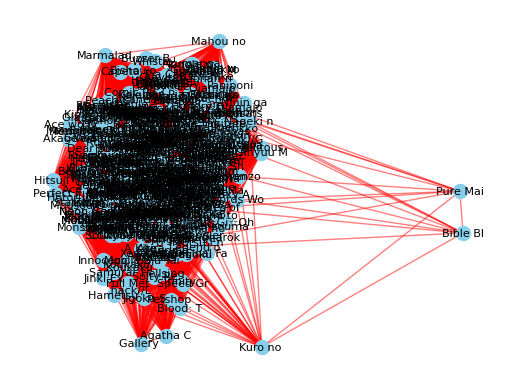

In [20]:
# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='skyblue')

# Draw the edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='red')

# Shorten the labels to 8 characters
truncated_labels = {node: node[:8] for node in G.nodes()}

# Draw the labels
nx.draw_networkx_labels(G, pos, labels=truncated_labels, font_size=8, font_family='sans-serif')

# Show the plot
plt.axis('off') 
plt.show()